In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('SPEArTC_November_2022.csv')
# Choose year and mean wind speeds columns only
df = pd.DataFrame(df.iloc[:,[1,10]])
df = df.drop(0)
print(df)

C:\Users\esl26\AppData\Local\Temp\ipykernel_40504\2926039442.py:1: DtypeWarning: Columns (1,2,8,9,10,11,13,14,15,16,17,18,19,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SPEArTC_November_2022.csv')


      Season Mean Wind Speed
1       1841            -999
2       1841            -999
3       1841            -999
4       1841            -999
5       1841            -999
...      ...             ...
47849   2022            35.0
47850   2022            35.0
47851   2022            30.0
47852   2022            25.0
47853   2022            25.0

[47853 rows x 2 columns]


In [71]:
'''CLEANING THE DATA'''

wind_speeds = df['Mean Wind Speed']

# Replace spaces with NaN
wind_speeds = wind_speeds.replace(' ', np.nan, regex=True)

# Fill NaN values with 0
wind_speeds = wind_speeds.fillna(0)  

# convert string literals to int
wind_speeds = wind_speeds.astype(float)

# filter out negative wind speeds
condition = (wind_speeds > 0)
df = df[condition]

print(df)

       Season Mean Wind Speed
16100  1974.8            18.8
16101    1956             9.4
16102    1956            18.8
16103    1956            21.3
16104    1956            23.5
...       ...             ...
47849    2022            35.0
47850    2022            35.0
47851    2022            30.0
47852    2022            25.0
47853    2022            25.0

[23576 rows x 2 columns]


In [83]:
'''FURTHER PROCESSING OF THE DATA'''
curr_year = 1974 # starting year
curr_wind_speed = 18.8 # starting wind_speed
curr_index = 16100 # starting label
ctr = 1
for index, row in df.iterrows():
    # print(index)
    # print(df.loc[index][1])
    year = row['Season']
    wind_speed = row['Mean Wind Speed']
    if curr_year == year:
        if curr_index == index:
            continue
        curr_wind_speed += float(wind_speed)
        df = df.drop(labels=index)
        ctr += 1
    else:
        # compute average
        df.loc[curr_index][1] = curr_wind_speed / ctr
        # update variables
        curr_year = year
        curr_index = index
        ctr = 1

print(df)


       Season Mean Wind Speed
16100  1974.8            18.8
16101    1956       25.465517
16583    1957       51.690909
16949    1958       44.363068
17448    1959         339.752
...       ...             ...
45681    2018     2240.398433
46122    2019     2023.450463
46554    2020     1861.670711
47060    2021     2718.790964
47456    2022            15.0

[68 rows x 2 columns]


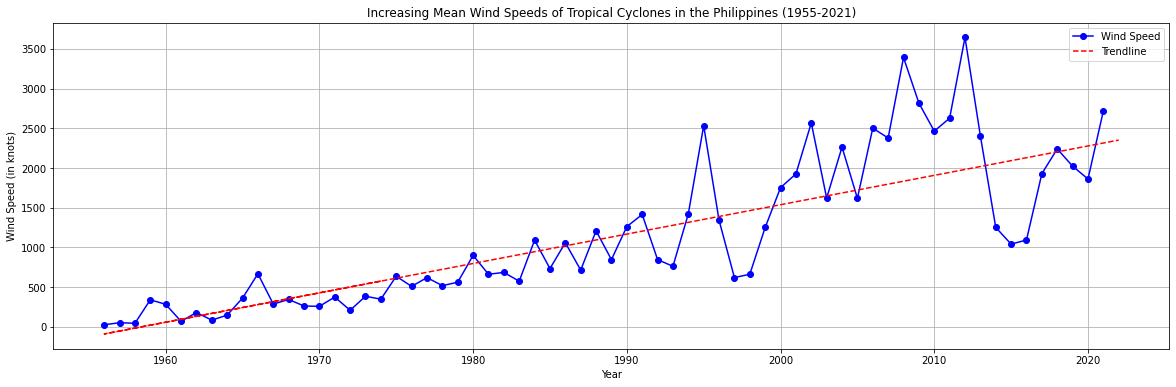

In [106]:
df['Mean Wind Speed'] = df['Mean Wind Speed'].astype(float)
df['Season'] = df['Season'].astype(int)

# Plot wind speeds and trendline
plt.figure(figsize=(20, 6))
plt.plot(df['Season'][1:-1], df['Mean Wind Speed'][1:-1], marker='o', linestyle='-', color='b', label='Wind Speed')

# Fit and plot trendline
coefficients = np.polyfit(df['Season'], df['Mean Wind Speed'], 1)
trend_line = np.polyval(coefficients, df['Season'])
plt.plot(df['Season'], trend_line, color='r', linestyle='--', label='Trendline')

# Customize plot
plt.xlabel('Year')
plt.ylabel('Wind Speed (in knots)')
plt.title('Increasing Mean Wind Speeds of Tropical Cyclones in the Philippines (1955-2021)')

# Display the equation of the trendline on the plot
equation = f'y = {coefficients[0]:.9f}x + {coefficients[1]:.9f}'
# plt.text(100, 100, equation, fontsize=12, color='black')
plt.legend()
plt.grid()
plt.show()